# Bussiness Understanding
Kanker usus merupakan salah satu pennyebab utama kematian akibat kanker di seluruh dunia. Tingkat kelangsungan hidup penderita ditentukan dari banyak faktor, seperti stadium kanker saat pemeriksaan, karakteristik pasien, efektivitas pengobatan, dan gaya hidup pasien. Oleh karena itu, penggunaan machine learning dalam membantu dokter mengambil keputusan saat perawatan pasien kanker usus sangatlah penting. Pada project ini, model akan dilatih agar dapat membantu dokter untuk mengambil keputusan apakah pasien perlu dioperasi atau tidak berdasarkan kebiasaan hidup mereka sehingga pasien selamat.


# Data Understanding
Data yang digunakan untuk melatih model adalah [Colorectal Cancer Risk & Survival Data](https://www.kaggle.com/datasets/ankushpanday1/colorectal-cancer-risk-and-survival-data). Data ini diambil dari platform Kaggle dan merupakan data publik. Saat digunakan, data ini di-*update* pada tanggal 09 Februari 2025. Data ini terdiri dari 89,945 sampel dan 30 fitur. Dataset ini dipilih karena mengandung informasi pasien kanker usus besar yang lengkap, seperti usia, gender, ras, gaya hidup, riwayat medis, akses pengobatan, dan hasil pengobatan. Selain itu, dataset juga sudah termasuk bersih.

## Data Loading

In [48]:
import pandas as pd

In [150]:
data = pd.read_csv("/content/drive/MyDrive/Latihan_Dicoding/colorectal_cancer_prediction.csv")
data.head()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


Kita akan menghapus kolom-kolom yang tidak memiliki hubungan erat dengan keselamatan pasien pada operasi. Selain itu, karena fokus kita adalah pasien yang selamat dengan atau tanpa operasi, maka sampel hanya akan diambil jika pada kolom 'Survival_Status' berstatus 'survived'

In [151]:
data = data[data['Survival_Status'] != 'survived']

In [152]:
data = data.drop(columns=["Patient_ID", "Race", "Region", "Urban_or_Rural", "Socioeconomic_Status", "Survival_Status", "Follow_Up_Adherence", "Recurrence", "Time_to_Recurrence"])

In [153]:
data.head()

,Age,Gender,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,Tumor_Aggressiveness,Colonoscopy_Access,Screening_Regularity,Diet_Type,BMI,...,Smoking_Status,Alcohol_Consumption,Red_Meat_Consumption,Fiber_Consumption,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received
0,71,Male,Yes,No,III,High,No,Regular,Western,33.0,...,Never,Low,Low,Low,Yes,Delayed,Good,Yes,No,No
1,34,Female,No,No,I,Medium,Yes,Regular,Western,33.1,...,Never,Low,Low,Low,No,Timely,Good,No,Yes,Yes
2,80,Female,No,No,III,Low,Yes,Regular,Balanced,20.7,...,Never,Low,Low,Medium,Yes,Timely,Limited,No,Yes,Yes
3,40,Male,No,No,I,Medium,Yes,Never,Traditional,38.9,...,Former,Low,Low,High,Yes,Delayed,Limited,Yes,No,Yes
4,43,Female,Yes,No,III,Low,Yes,Never,Traditional,24.8,...,Former,High,Medium,Low,No,Delayed,Good,Yes,No,Yes


## EDA - Deskripsi Variabel

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      89945 non-null  int64  
 1   Gender                   89945 non-null  object 
 2   Family_History           89945 non-null  object 
 3   Previous_Cancer_History  89945 non-null  object 
 4   Stage_at_Diagnosis       89945 non-null  object 
 5   Tumor_Aggressiveness     89945 non-null  object 
 6   Colonoscopy_Access       89945 non-null  object 
 7   Screening_Regularity     89945 non-null  object 
 8   Diet_Type                89945 non-null  object 
 9   BMI                      89945 non-null  float64
 10  Physical_Activity_Level  89945 non-null  object 
 11  Smoking_Status           89945 non-null  object 
 12  Alcohol_Consumption      89945 non-null  object 
 13  Red_Meat_Consumption     89945 non-null  object 
 14  Fiber_Consumption     

Berdasarkan program diatas, dapat dilihat bahwa dataset terdiri dari 4 fitur numerikal dan 26 fitur kategorikal

In [155]:
data.describe()

,Age,BMI
count,89945.000000,89945.000000
mean,54.332892,29.268105
std,20.182220,6.211668
min,20.000000,18.500000
25%,37.000000,23.900000
50%,54.000000,29.300000
75%,72.000000,34.600000
max,89.000000,40.000000


Berdasarkan program diatas, usia pasien pada dataset rata-rata 54 tahun, dengan pasien termuda berusia 20 tahun dan tertua berusia 89 tahun.

## EDA - Missing Value Handling

In [156]:
data.isna().sum()

,0
Age,0
Gender,0
Family_History,0
Previous_Cancer_History,0
Stage_at_Diagnosis,0
Tumor_Aggressiveness,0
Colonoscopy_Access,0
Screening_Regularity,0
Diet_Type,0
BMI,0


In [157]:
surgery = (data.Surgery_Received == 0).sum()

In [158]:
print("jumlah missing value pada fitur surgery_received ", surgery)

jumlah missing value pada fitur surgery_received  0


## EDA - Univariate Analysis

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler

In [160]:
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [161]:
numeric_feature = data.select_dtypes(include=['float64', 'int64']).columns
categorical_feature = data.select_dtypes(include=['object']).columns

**Analisis Fitur Numerikal**

Dibawah ini akan diperlihatkan kemiringan data pada fitur numerik.

In [162]:
skewness_analysis = {}

for col in numeric_feature:
  skewness = data[col].skew() # Jika > 0, distribusi condong ke kanan
  kurtosis = data[col].kurt() # Jika > 3, distribusi lebih runcing dari normal
  stat, p = shapiro(data[col])
  skewness_analysis[col] = {
      'skewness': skewness,
      'kurtosis': kurtosis,
      'stats' : stat,
      'p-value' : p
      }

df_skewness = pd.DataFrame(skewness_analysis).T
df_skewness

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 89945.
  res = hypotest_fun_out(*samples, **kwds)


,skewness,kurtosis,stats,p-value
Age,0.007863,-1.200996,0.95439,9.487296e-90
BMI,-0.003191,-1.203308,0.95454,1.141996e-89


Dibawah ini merupakan visualisasi dari tiap fitur numerik

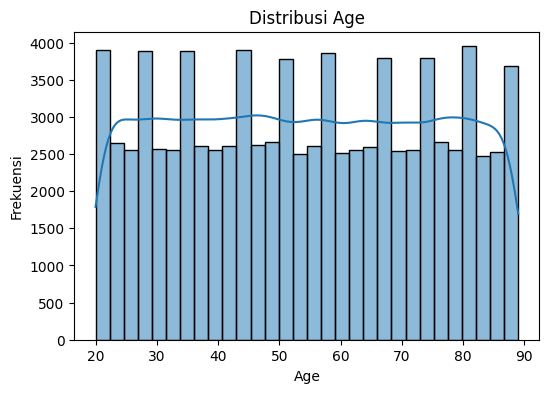

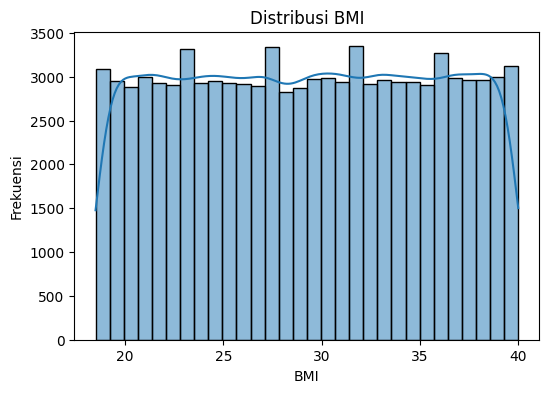

In [163]:
for col in numeric_feature:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

Berdasarkan analisis diatas dapat dilihat bahwa data numerik hampir terdistribusi normal jika kita menggunakan analisis kemiringan data. Namun, setelah dataset dianalisis lagi menggunakan metode saphiro wilk, data menunjukkan tidak terdistribusi normal. Karena kasus pada latihan ini bersifat klasifikasi, tidak wajib mengolah kembali data hingga menjadi terdistribusi normal.

**Analisis Fitur Kategorikal**

Pada tahap ini, kita akan menganalisis distribusi data pada fitur kategorikal

In [164]:
data[categorical_feature].nunique()

,0
Gender,2
Family_History,2
Previous_Cancer_History,2
Stage_at_Diagnosis,4
Tumor_Aggressiveness,3
Colonoscopy_Access,2
Screening_Regularity,3
Diet_Type,3
Physical_Activity_Level,3
Smoking_Status,3


In [165]:
data[categorical_feature].value_counts()

Gender  Family_History  Previous_Cancer_History  Stage_at_Diagnosis  Tumor_Aggressiveness  Colonoscopy_Access  Screening_Regularity  Diet_Type    Physical_Activity_Level  Smoking_Status  Alcohol_Consumption  Red_Meat_Consumption  Fiber_Consumption  Insurance_Coverage  Time_to_Diagnosis  Treatment_Access  Chemotherapy_Received  Radiotherapy_Received  Surgery_Received
Female  No              No                       III                 Medium                Yes                 Regular               Western      Low                      Never           Low                  Medium                Medium             Yes                 Timely             Good              Yes                    Yes                    Yes                 5
Male    No              No                       I                   Low                   Yes                 Regular               Western      Medium                   Never           Low                  Low                   Low                Yes                 Timely             Good              No                     Yes                    Yes                 4
                                                                                                                                     Traditional  Low                      Never           Low                  Low                   Low                Yes                 Timely             Good              Yes                    No                     Yes                 4
                                                                                                                                     Western      Low                      Never           Low                  Low                   Medium             Yes                 Timely             Good              No                     Yes                    Yes                 4
Female  No              No                       II                  Low                   Yes                 Regular               Western      Low                      Former          Low                  Low                   Medium             Yes                 Delayed            Good              No                     No                     Yes                 4
                                                                                                                                                                                                                                                                                                                                                                                   ..
        Yes             No                       I                   High                  No                  Never                 Western      Medium                   Never           Medium               Low                   Medium             Yes                 Timely             Good              Yes                    No                     No                  1
                                                                                                                                                                                                                High                  Medium             Yes                 Timely             Limited           No                     No                     Yes                 1
                                                                                                                                                                           Former          Low                  Low                   Medium             Yes                 Timely             Limited           No                     No                     Yes                 1
                                                                                                                                                                           Current         Low                  Medium                Medium             Yes             

        jumlah sampel  persentase
Gender                           
Male            49369        54.9
Female          40576        45.1


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


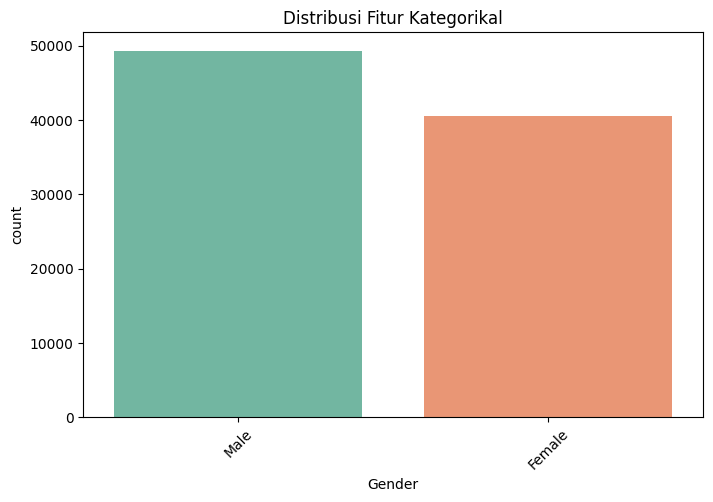

                jumlah sampel  persentase
Family_History                           
No                      67372        74.9
Yes                     22573        25.1


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


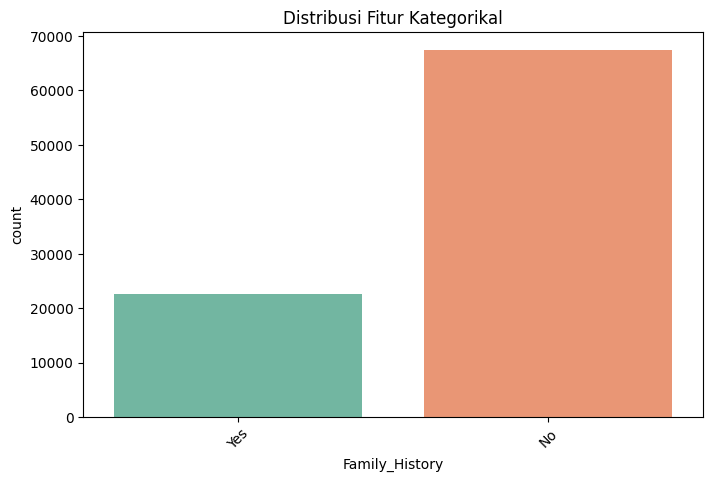

                         jumlah sampel  persentase
Previous_Cancer_History                           
No                               80985        90.0
Yes                               8960        10.0


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


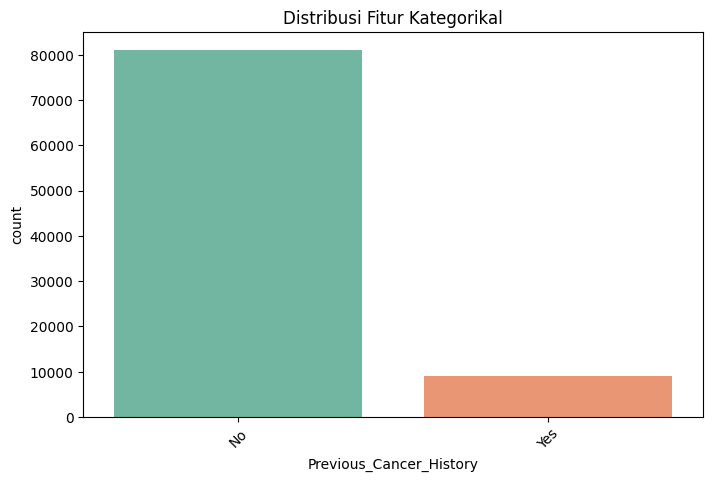

                    jumlah sampel  persentase
Stage_at_Diagnosis                           
II                          26869        29.9
I                           22594        25.1
III                         22412        24.9
IV                          18070        20.1


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


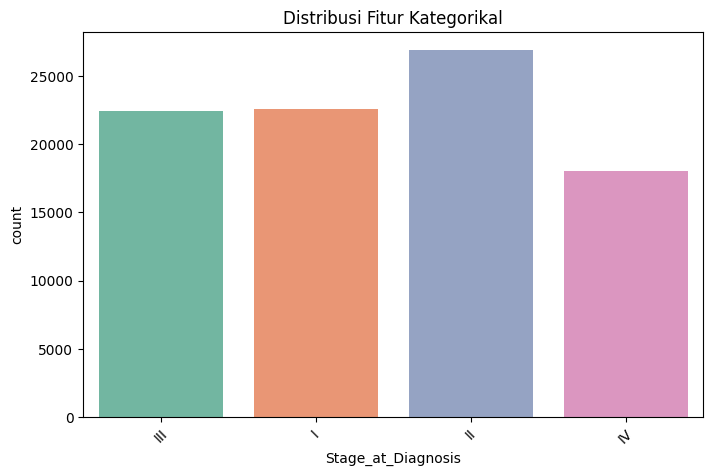

                      jumlah sampel  persentase
Tumor_Aggressiveness                           
Medium                        35974        40.0
Low                           35931        39.9
High                          18040        20.1


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


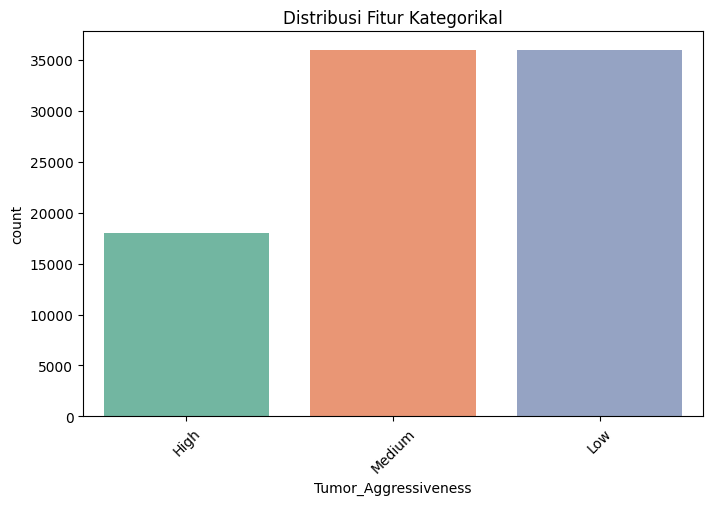

                    jumlah sampel  persentase
Colonoscopy_Access                           
Yes                         67567        75.1
No                          22378        24.9


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


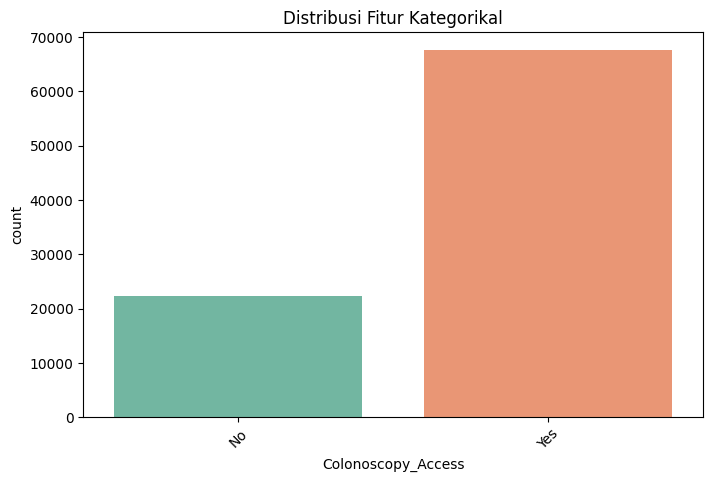

                      jumlah sampel  persentase
Screening_Regularity                           
Regular                       45162        50.2
Irregular                     27101        30.1
Never                         17682        19.7


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


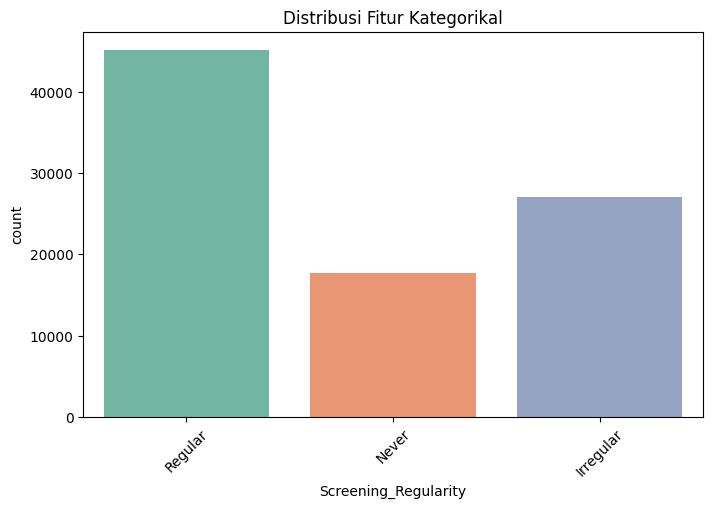

             jumlah sampel  persentase
Diet_Type                             
Western              44710        49.7
Balanced             27072        30.1
Traditional          18163        20.2


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


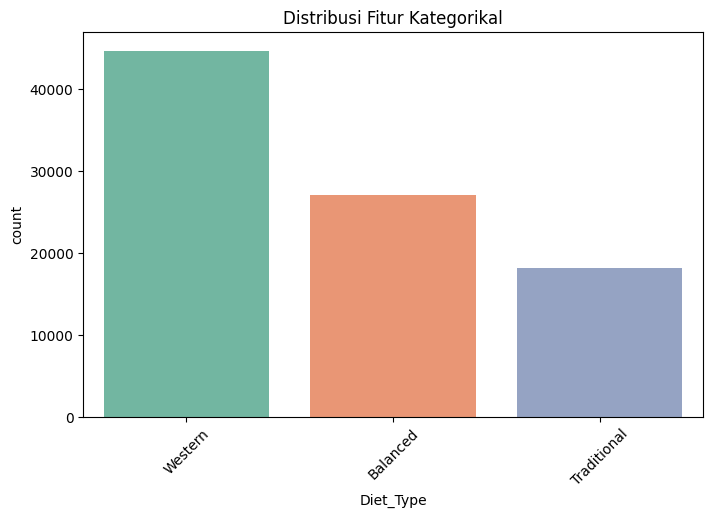

                         jumlah sampel  persentase
Physical_Activity_Level                           
Low                              44867        49.9
Medium                           31420        34.9
High                             13658        15.2


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


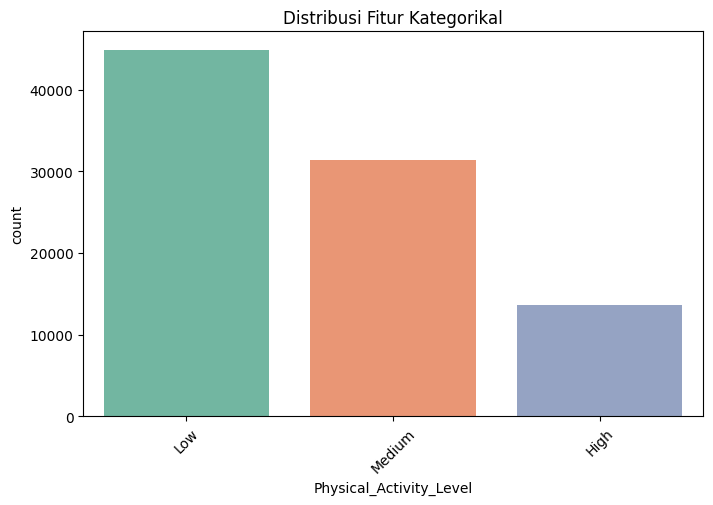

                jumlah sampel  persentase
Smoking_Status                           
Never                   44946        50.0
Former                  26900        29.9
Current                 18099        20.1


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


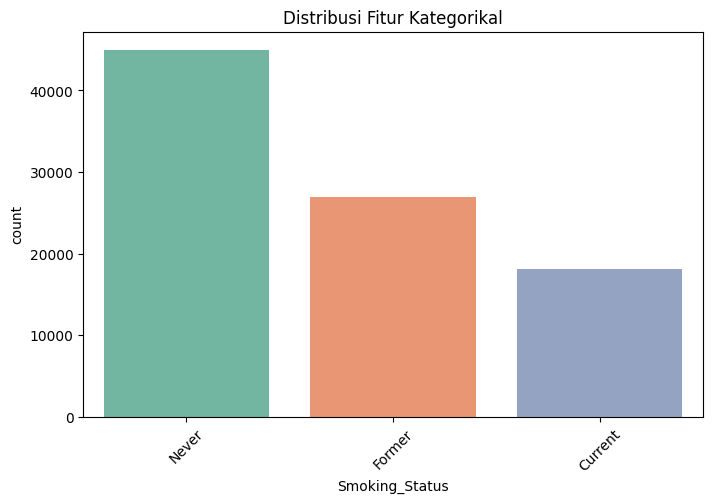

                     jumlah sampel  persentase
Alcohol_Consumption                           
Low                          45010        50.0
Medium                       26982        30.0
High                         17953        20.0


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


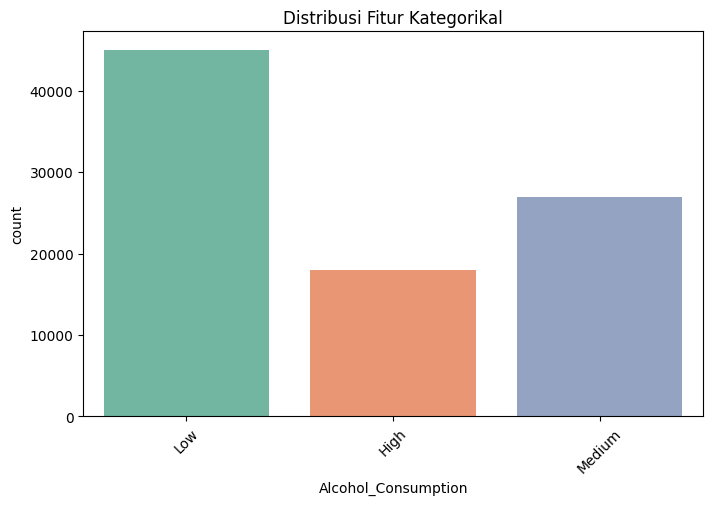

                      jumlah sampel  persentase
Red_Meat_Consumption                           
Low                           36191        40.2
Medium                        35830        39.8
High                          17924        19.9


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


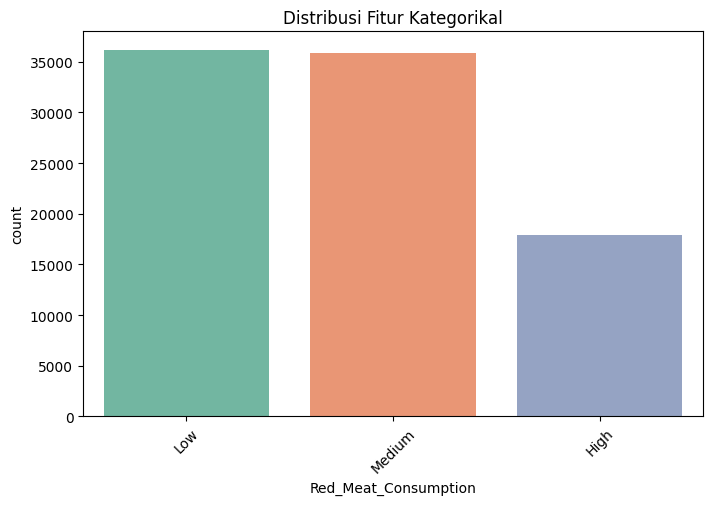

                   jumlah sampel  persentase
Fiber_Consumption                           
Medium                     44839        49.9
Low                        27198        30.2
High                       17908        19.9


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


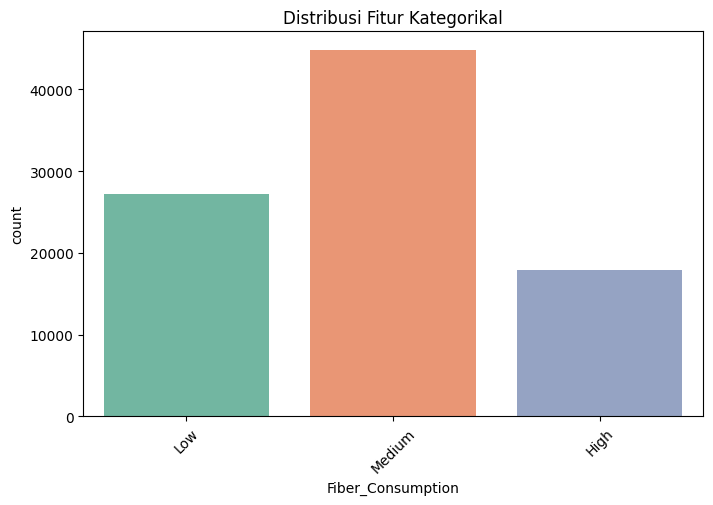

                    jumlah sampel  persentase
Insurance_Coverage                           
Yes                         72118        80.2
No                          17827        19.8


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


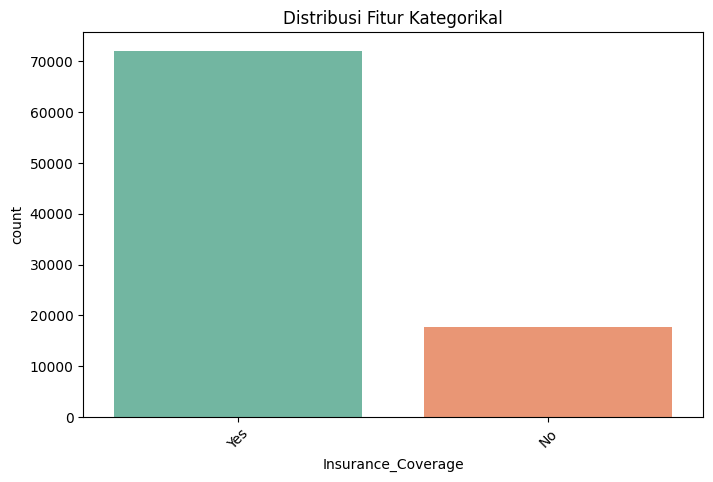

                   jumlah sampel  persentase
Time_to_Diagnosis                           
Timely                     54080        60.1
Delayed                    35865        39.9


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


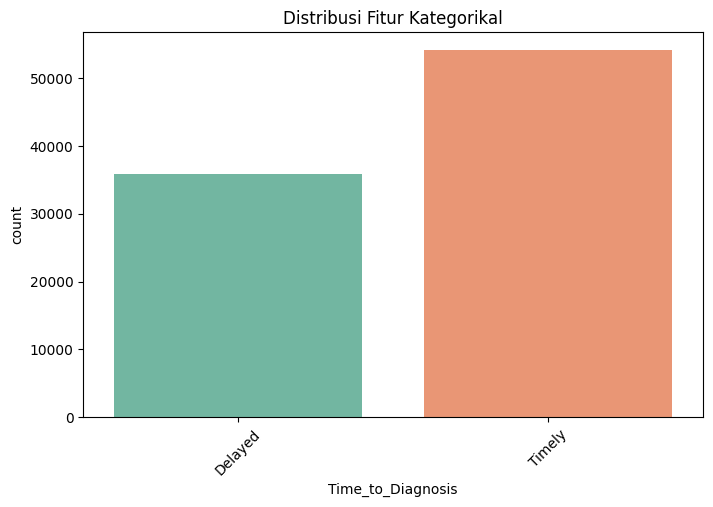

                  jumlah sampel  persentase
Treatment_Access                           
Good                      62897        69.9
Limited                   27048        30.1


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


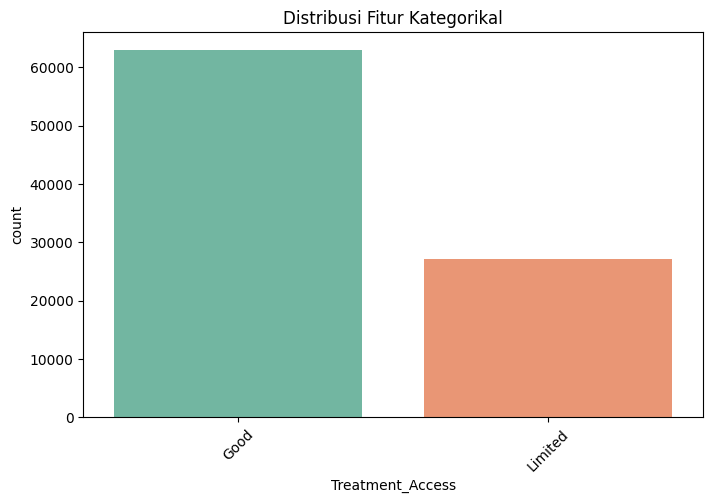

                       jumlah sampel  persentase
Chemotherapy_Received                           
Yes                            45067        50.1
No                             44878        49.9


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


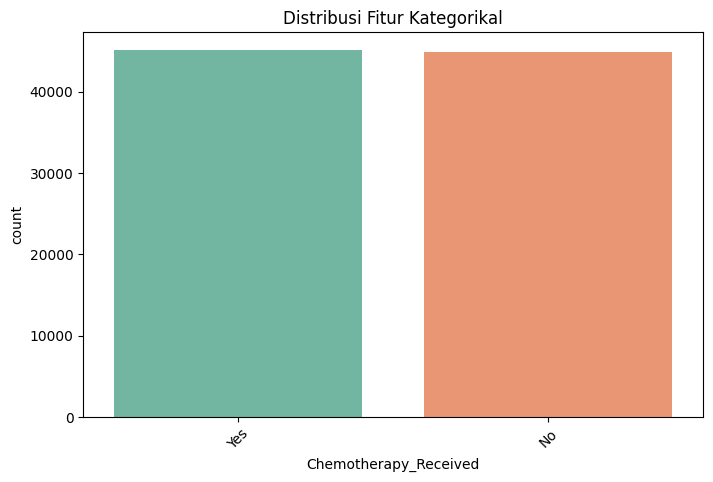

                       jumlah sampel  persentase
Radiotherapy_Received                           
No                             53952        60.0
Yes                            35993        40.0


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


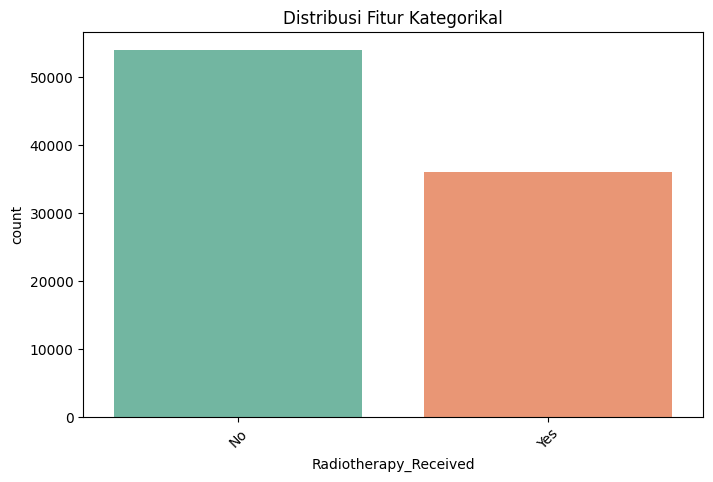

                  jumlah sampel  persentase
Surgery_Received                           
Yes                       62879        69.9
No                        27066        30.1


<ipython-input-166-9f3c0727e714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


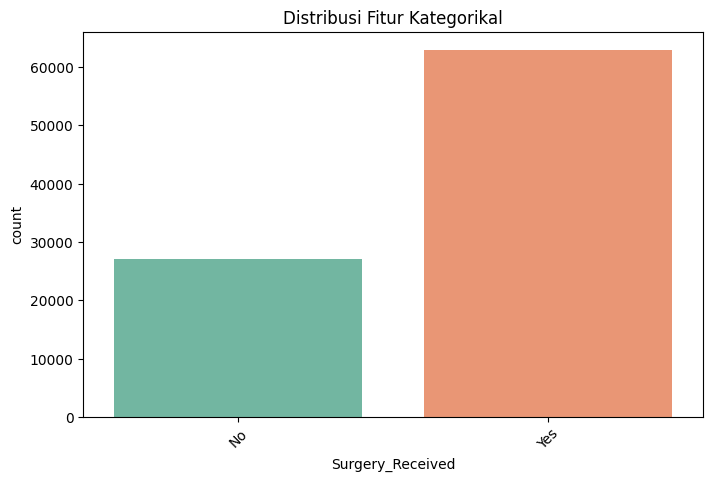

In [166]:
for col in categorical_feature:
  percent = 100*data[col].value_counts(normalize=True)
  count = data[col].value_counts()
  df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
  print(df)

  plt.figure(figsize=(8, 5))
  sns.countplot(x=data[col], palette='Set2')
  plt.xticks(rotation=45)
  plt.title('Distribusi Fitur Kategorikal')
  plt.show()

Berdasarkan visualisasi sampel diatas, berikut merupakan informasi yang diperoleh.


1.   Penderita kanker usus besar sebagian besar pria, yaitu lebih dari 54%
2.   Sebagian besar penderita kanker usus besar tidak memiliki riwayat keluarga dengan penyakit yang sama. Hal ini memperlihatkan riwayat keluarga tidak begitu berpengaruh pada penyakit ini (74%).
3.   Sebagin besar penderita kanker bahkan tidak memiliki riwayat kanker sebelumnya (90%).
4.   Sampel diambil dari berbagai pasien dengan stadium kanker berbeda. Pada sampel, kanker stadium 3 paling banyak diderita pasien.
5.   Sebagian besar pasien memiliki tumor dengan keganasan tingkat menengah dan rendah.
6.   Pasien yang memiliki akses kolonoskopi lebih banyak daripada yang tidak ada.
7.   Pasien dengan kebiasaan diet barat lebih dominan dari tipe diet lain.



# EDA - Multivariate Analysis

**Analisis Fitur Kategorikal**

Fitur target yaitu Survival_Status bersifat kategorikal. Oleh karena itu, multivariate analysis pada fitur-fitur kategorikal lain akan menggunakan mosaic grafik.

In [167]:
cat_features = data.select_dtypes(include=['object']).columns

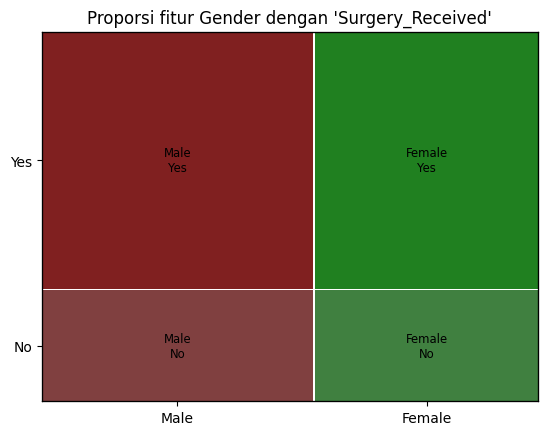

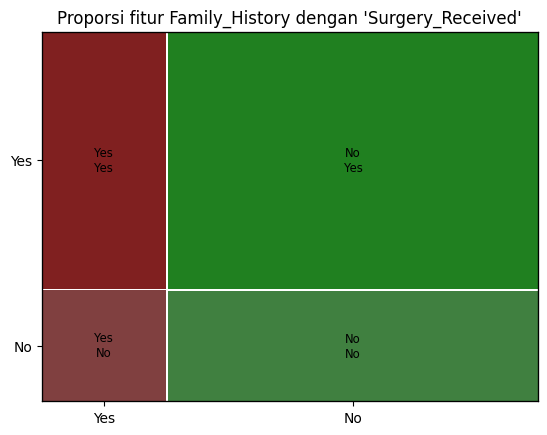

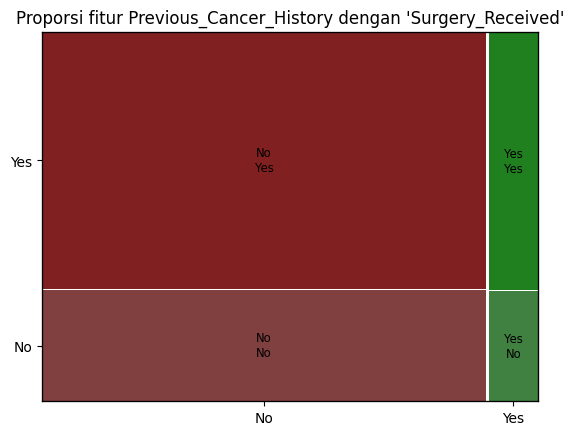

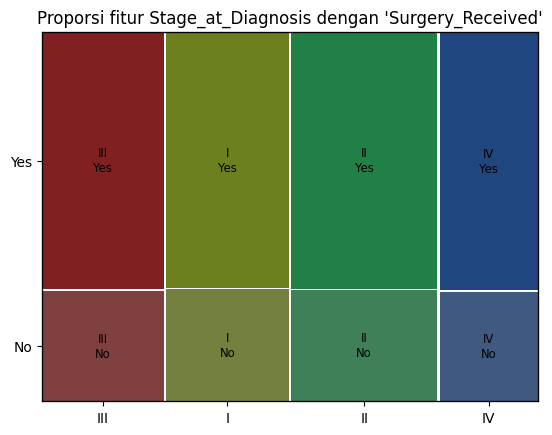

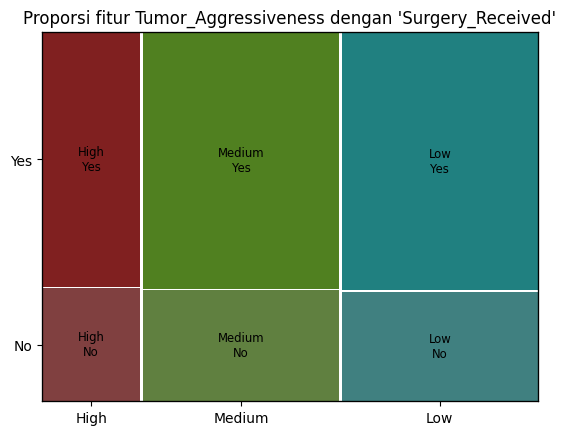

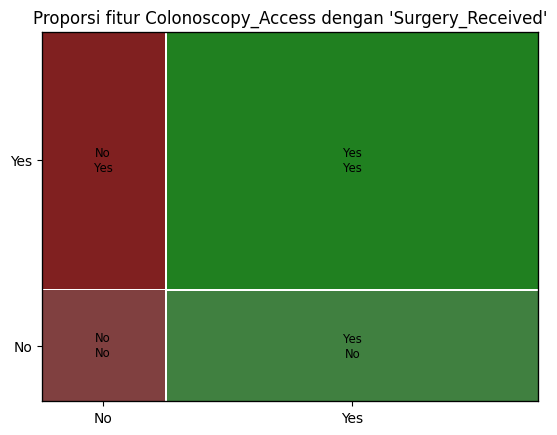

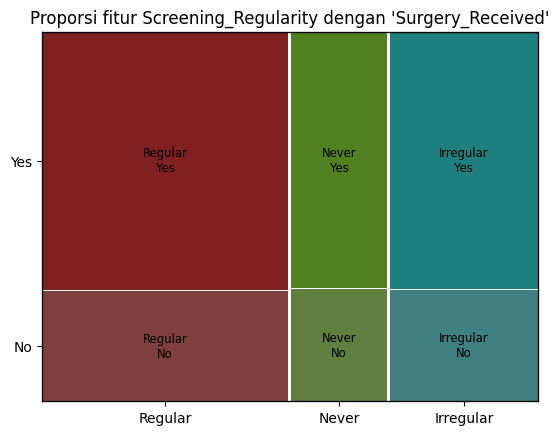

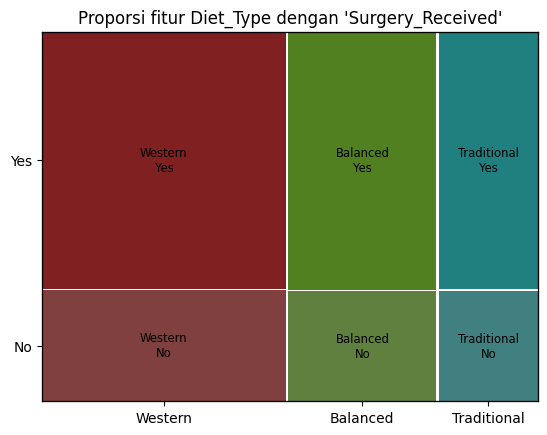

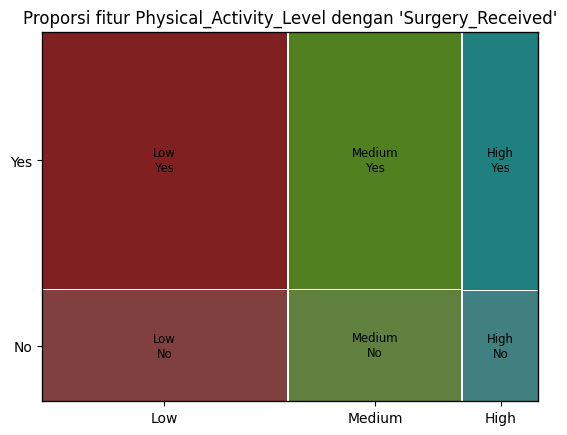

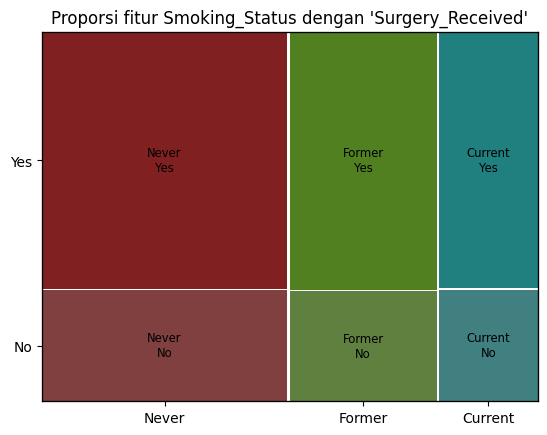

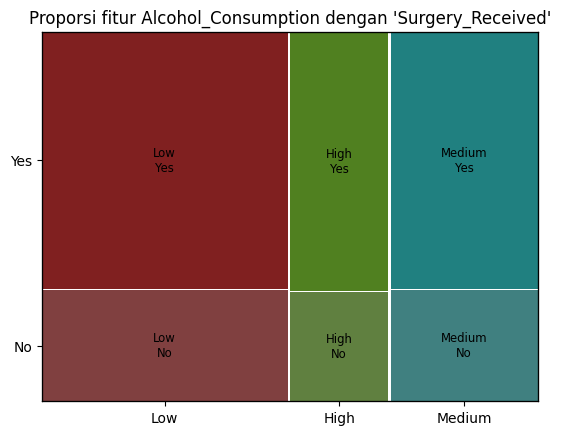

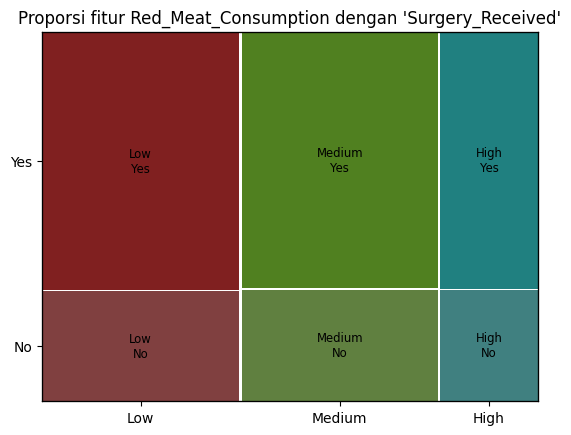

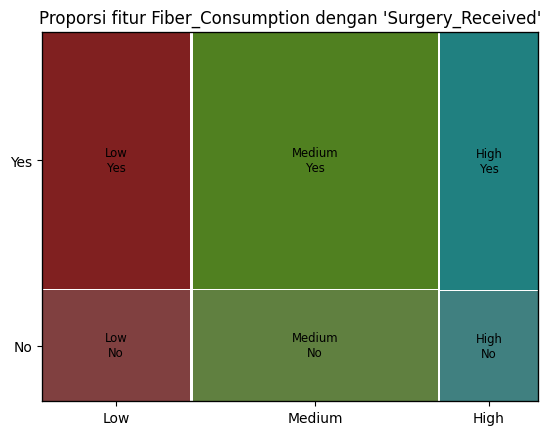

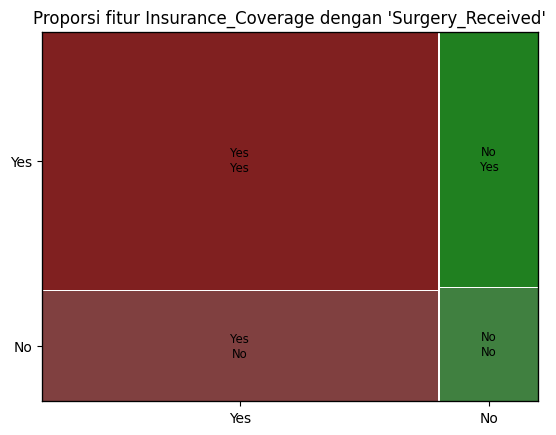

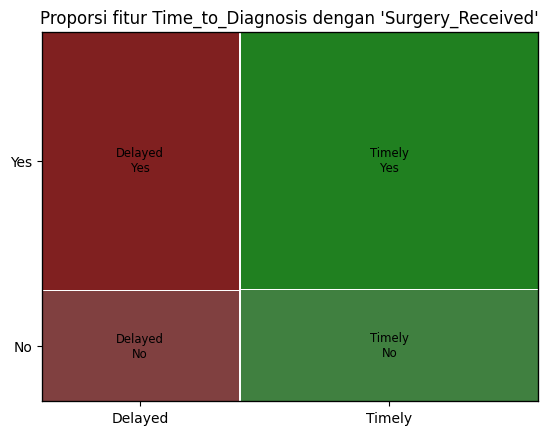

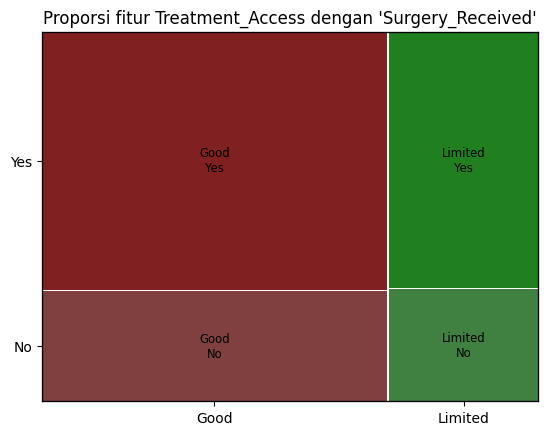

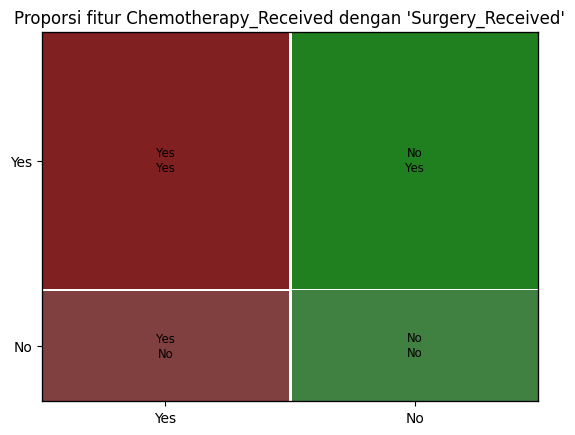

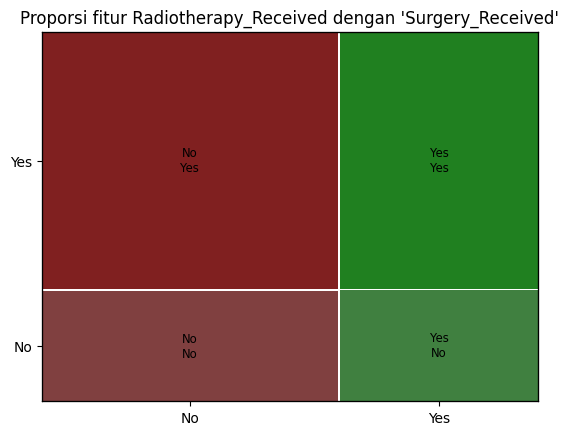

In [168]:
for col in cat_features:
  if col != 'Surgery_Received':
    mosaic(data, [col, 'Surgery_Received'])
    plt.title(f"Proporsi fitur {col} dengan 'Surgery_Received'")
    plt.show()

Berdasarkan grafik mosaic diatas, semua fitur kategorikal memiliki hubungan kuat dengan fitur target 'Survival_Status', karena proporsi grafik menunjukkan perbedaan ukuran. Pada tahap fitur selection dibawah akan dipilih kembali fitur-fitur kategorikal yang memiliki korelsi kuat dengan fitur target menggunakan analisis chi square.

**Analisis Fitur Numerik**

Untuk multivariate analysis ini akan menggunakan uji Mann-Whitney U dan visualisasi violinplot. Uji Mann-Whitney U dipilih karena ketiga fitur numerik tidak terdistribusi secara normal. Selain itu, fitur label juga hanya memiliki 2 kategori saja.

Sedangkan visualisasi violinplot digunakan agar melihat detail perbedaan bentuk dari masing-masing fitur.

In [169]:
from scipy.stats import mannwhitneyu
import numpy as np

In [170]:
results = {}

for col in numeric_feature:
    group1 = data[data['Surgery_Received'] == 'Yes'][col]
    group2 = data[data['Surgery_Received'] == 'No'][col]

    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

    results[col] = {'U-Statistic': stat, 'p-value': p_value}

df_results = pd.DataFrame(results).T
df_results

,U-Statistic,p-value
Age,843664772.5,0.041591
BMI,854571420.5,0.309471


<ipython-input-171-3976f51b5482>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Surgery_Received'], y=data[col], palette='Set2')


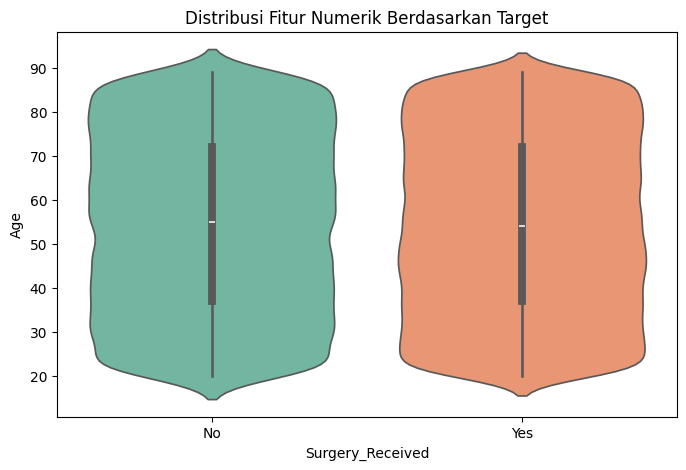

<ipython-input-171-3976f51b5482>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Surgery_Received'], y=data[col], palette='Set2')


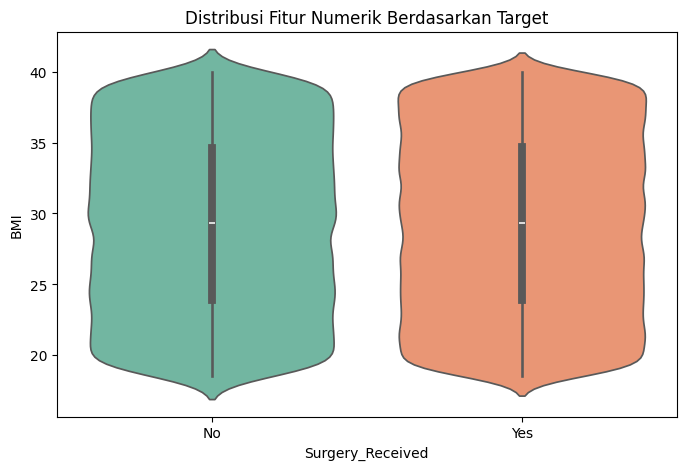

In [171]:
for col in numeric_feature:
  plt.figure(figsize=(8, 5))
  sns.violinplot(x=data['Surgery_Received'], y=data[col], palette='Set2')
  plt.title('Distribusi Fitur Numerik Berdasarkan Target')
  plt.show()

Berdasarkan ketiga grafik violinplot diatas, fitur Age, BMI, dan Time_to_Recurrence tidak memiliki hubungan kuat dengan fitur target karena tidak terlihat perbedaan mencolok antar kategori. Selain itu, berdasarkan uji Mann-Whitney U, p-value dari ketiga fitur tersebut > 0.05 yang menandakan tidak ada perbedaan signifikan diantara fitur-fitur tersebut. Oleh karena itu, ketiga fitur tersebut akan dihapus dari dataset.


In [172]:
data = data.drop(columns=["BMI"])

# Data Preparation

Oleh karena semua fitur numerik sudah dihapus pada tahap sebelumnya maka yang akan digunakan untuk melatih model adalah fitur-fitur kategorikal. Pada tahap ini, fitur kategorikal akan diubah terlebih dahulu menjadi bentuk one hot encoding agar lebih mudah dipahami model.

In [112]:
from sklearn.preprocessing import OneHotEncoder

In [173]:
surgery_encoding = pd.get_dummies(data['Surgery_Received'], dtype=int)
data = pd.concat([data, surgery_encoding], axis=1)
data = data.drop(columns=['Surgery_Received', 'No'])

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      89945 non-null  int64 
 1   Gender                   89945 non-null  object
 2   Family_History           89945 non-null  object
 3   Previous_Cancer_History  89945 non-null  object
 4   Stage_at_Diagnosis       89945 non-null  object
 5   Tumor_Aggressiveness     89945 non-null  object
 6   Colonoscopy_Access       89945 non-null  object
 7   Screening_Regularity     89945 non-null  object
 8   Diet_Type                89945 non-null  object
 9   Physical_Activity_Level  89945 non-null  object
 10  Smoking_Status           89945 non-null  object
 11  Alcohol_Consumption      89945 non-null  object
 12  Red_Meat_Consumption     89945 non-null  object
 13  Fiber_Consumption        89945 non-null  object
 14  Insurance_Coverage       89945 non-nul

In [175]:
data = data.rename(columns={'Yes' : 'Surgery_Received'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      89945 non-null  int64 
 1   Gender                   89945 non-null  object
 2   Family_History           89945 non-null  object
 3   Previous_Cancer_History  89945 non-null  object
 4   Stage_at_Diagnosis       89945 non-null  object
 5   Tumor_Aggressiveness     89945 non-null  object
 6   Colonoscopy_Access       89945 non-null  object
 7   Screening_Regularity     89945 non-null  object
 8   Diet_Type                89945 non-null  object
 9   Physical_Activity_Level  89945 non-null  object
 10  Smoking_Status           89945 non-null  object
 11  Alcohol_Consumption      89945 non-null  object
 12  Red_Meat_Consumption     89945 non-null  object
 13  Fiber_Consumption        89945 non-null  object
 14  Insurance_Coverage       89945 non-nul

In [176]:
for col in cat_features:
  if col != 'Surgery_Received':
    data = pd.concat([data, pd.get_dummies(data[col], dtype=int)], axis=1)

In [177]:
for col in cat_features:
  if col != 'Surgery_Received':
    data = data.drop(columns=col)

In [178]:
data.head()

,Age,Surgery_Received,Female,Male,No,Yes,No,Yes,I,II,...,No,Yes,Delayed,Timely,Good,Limited,No,Yes,No,Yes
0,71,0,0,1,0,1,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
1,34,1,1,0,1,0,1,0,1,0,...,1,0,0,1,1,0,1,0,0,1
2,80,1,1,0,1,0,1,0,0,0,...,0,1,0,1,0,1,1,0,0,1
3,40,1,0,1,1,0,1,0,1,0,...,0,1,1,0,0,1,0,1,1,0
4,43,1,1,0,0,1,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0


Setelah kolom kategorikal sudah diubah, selanjutnya akan dilakukan pembagian dataset menjadi data latih dan data test. Karena jumlah nya sangat banyak, maka kita hanya akan mengambil 0.05 bagian data set untuk data testnya.

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X = data.drop(["Surgery_Received"],axis =1)
y = data["Surgery_Received"]

In [184]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          89945 non-null  int64
 1   Female       89945 non-null  int64
 2   Male         89945 non-null  int64
 3   No           89945 non-null  int64
 4   Yes          89945 non-null  int64
 5   No           89945 non-null  int64
 6   Yes          89945 non-null  int64
 7   I            89945 non-null  int64
 8   II           89945 non-null  int64
 9   III          89945 non-null  int64
 10  IV           89945 non-null  int64
 11  High         89945 non-null  int64
 12  Low          89945 non-null  int64
 13  Medium       89945 non-null  int64
 14  No           89945 non-null  int64
 15  Yes          89945 non-null  int64
 16  Irregular    89945 non-null  int64
 17  Never        89945 non-null  int64
 18  Regular      89945 non-null  int64
 19  Balanced     89945 non-null  int64
 20  Tradit

**Splitting data**

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 123)

In [183]:
print(f'Total # of sample in whole dataset: {len(y_train)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 85447
Total # of sample in train dataset: 85447
Total # of sample in test dataset: 4498


# Model Development

Pada latihan ini, model yang akan diuji ada 6 model, yaitu Logistic Regression, Decision Tree,

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier

In [186]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'],
                      index=['Decission Tree', 'Random Forest', 'KNN', 'Boosting'])

## Decision Tree

In [187]:
model_2 = DecisionTreeClassifier(random_state=16)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=16)

## Random Forest

In [188]:
model_3 = RandomForestClassifier(random_state=16)
model_3.fit(X_train, y_train)

RandomForestClassifier(random_state=16)

## K-Nearest Neighbor

In [189]:
model_5 = KNeighborsClassifier()
model_5.fit(X_train, y_train)

KNeighborsClassifier()

## Boosting

In [190]:
models_7 = AdaBoostClassifier(learning_rate=0.05, random_state=55)
models_7.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.05, random_state=55)

# Evaluation

In [191]:
model_dict = {
    'Decission Tree': model_2,
    'Random Forest': model_3,
    'KNN': model_5,
    'Boosting': models_7
}

In [192]:
for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  models.loc[name, 'test_mse'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

In [193]:
models

,train_mse,test_mse
Decission Tree,0.0,0.00044
Random Forest,0.0,0.000321
KNN,0.000256,0.000368
Boosting,0.000301,0.000309


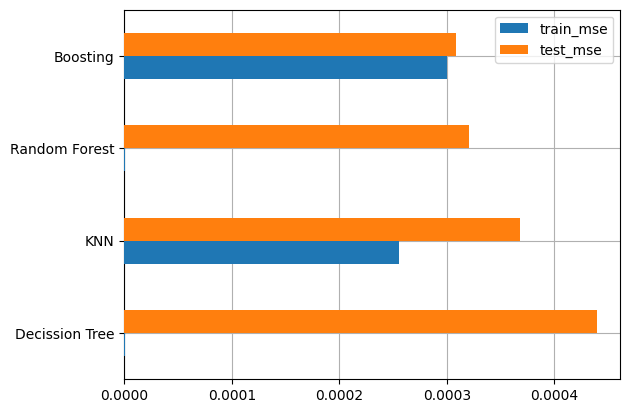

In [194]:
fig, ax = plt.subplots()
models.sort_values(by='test_mse',axis=0, ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan hasil evaluasi model diatas terlihat bahwa model Boosting, Random Forest, dan Decision Tree menghasilkan error yang lebih rendah dari model KNN. Sehingga model Boosting, Random Forest, dan Decision Tree yang akan kita pilih sebagai model terbaik untuk melakukan prediksi status bertahan hidup.

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa data dari data test.

In [199]:
prediksi = X_test.iloc[0:10].copy()
pred_dict = {'y_true':y_test[0:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_Decission Tree,prediksi_Random Forest,prediksi_KNN,prediksi_Boosting
19907,1,1,1,1,1
47199,1,0,1,1,1
59889,1,1,1,1,1
36144,1,1,1,1,1
12830,1,1,1,1,1
74401,1,0,1,1,1
44839,1,1,1,1,1
52430,1,1,1,1,1
85719,1,1,1,1,1
1040,1,0,1,0,1
